In [2]:
import os
os.chdir("E:/pythontraining/imarticus/ML_python/decision_tree/")

# Intro to ensemble methods

**Ensemble methods** are supervized learning models which combine the predictions of multiple smaller models to improve predictive power and generalization.

The smaller models that combine to make the ensemble model are referred to as **base models**. Ensemble methods often result in considerably higher performance than any of the individual base models could achieve.



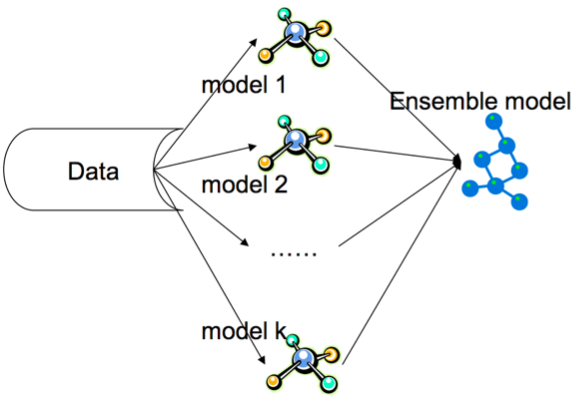

## When to use ensembles

    - Medical diagnoses
    - Predicting disease outbreak, natrual disasters
    - Stock market predictions
    - AI

Or any case where the highest performance is desired at the expense of model interpretability.

## Two popular families of ensemble methods

---

**BAGGING** - Boostrap Aggregation

Several estimators are built independently on subsets of the data and their predictions are averaged. Typically the combined estimator is usually better than any of the single base estimator.

**Bagging can reduce variance with little to no effect on bias.**

    ex: Random Forests

---

**BOOSTING**

Base estimators are built sequentially. Each subsequent estimator focuses on the weaknesses of the previous estimators. In essence several weak models "team up" to produce a powerful ensemble model. (We will discuss these later this week.)

**Boosting can reduce bias without incurring higher variance.**

    ex: Gradient Boosted Trees, AdaBoost

## Potential deficiencies of base models

There are three categories of weaknesses in which "base models" can fail or produce poor results:

1. Statistical problems
2. Computational problems
3. "Representational" problems

Ensemble methods are designed to address any or all three.

---

Let

### $$ \begin{aligned} \text{true function of data} &= f() \\ \text{model function of data} &= h() \end{aligned}$$

Where $h()$ can be a classifier or a regression model.

### Statistical problem

**The amount of training data available is small**. A single base classifier will have difficulty converging to $h()$.

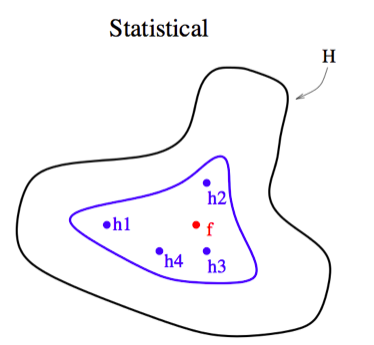

---

A bagging ensemble model, for example, mitigates this problem by "averaging out" base classifier predictions to improve convergence on the true function.

### Computational problem

There is sufficient training data, but it is computationally intractable to find the best model $h()$.

For example, if a base classifier is a decision tree, an exhaustive search of the hypothesis space of all possible classifiers is extremely complex (NP-complete).

This is, for example, why decision trees use heuristic algorithms at nodes (greedy search).

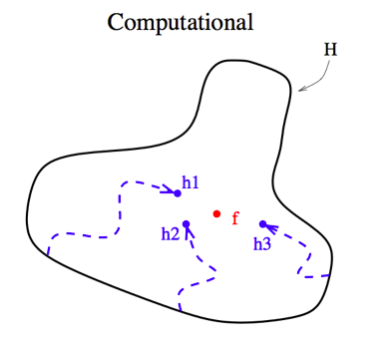
---

Ensembles composed of several, simpler base models using different starting points can converge faster to a good approximation of $f()$.

### Representational problem

Suppose we use a decision tree as a base classifier. A decision tree works by forming a "rectilinear" partition of the feature space, **i.e it always cuts at a fixed value along a feature.**

But what if $f()$ is best modeled by diagonal line?

It cannot be represented by a finite number of rectilinear segments, and the true decision boundary cannot be obtained by the decision tree classifier.

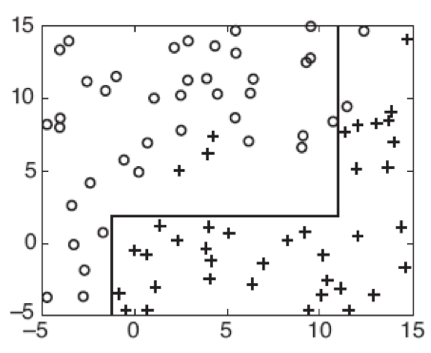

**A representational problem occurs when $f()$ cannot be expressed in terms of our hypothesis at all.** 

Yet, it may be still be possible to approximate $f()$ by expanding the space of representable functions using ensemble methods!

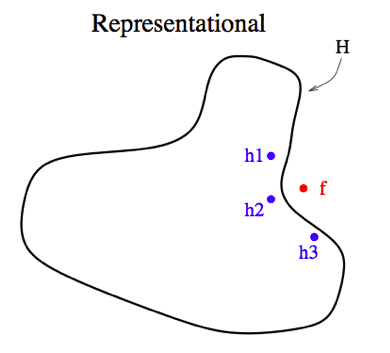

## Conditions for ensembles to outperform base models

For an ensemble method to perform better than a base classifier, it must meet these two criteria:

1. **Accuracy:** the combination of base classifiers must outperform random guessing. 
2. **Diversity:** base models must not be identical in classification/regression estimates.
  

## Bagging

The ensemble method we will be using today is called **bagging**, which is short for **bootstrap aggregating**.

Bagging builds multiple base models with **resampled training data with replacement.** We train $k$ base classifiers on $k$ different samples of training data. Using random subsets of the data to train base models promotes more differences between the base models.

Random Forests, which "bag" decision trees, can achieve very high classification accuracy.

## Bagging's magic decrease of model variance 

One of the biggest advantages of Random Forests is that they **decrease variance without increasing bias**. Essentially you can get a better model without having to trade off between bias and variance.

---

**VARIANCE DECREASE**

Base model estimates are averaged together, so variability of model predictions (across hypothetical samples) is lower.

---

**NO/LITTLE BIAS INCREASE**

The bias remains the same as the bias of the individual base models. The model is still able to model the "true function" since the  base models' complexity is unrestricted (low bias).


### Implementing a bagging classifier

We can, for instance, build an ensemble from a collection of 10 *k*-NN classifiers as follows:

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=10,oob_score=True)

The BaggingClassifier class provides a number of options to customize the ensemble:
- n_estimators: As shown in the preceding code, this specifies the number of base estimators in the ensemble.
- max_samples: This denotes the number (or fraction) of samples to draw from the dataset to train each base estimator. We can set bootstrap=True to sample with replacement (effectively implementing bagging), or we can set bootstrap=False to implement pasting.
- max_features: This denotes the number (or fraction) of features to draw from the feature matrix to train each base estimator. We can set `max_samples`$=1.0$ and `max_features`$<1.0$ to implement the random subspace method. Alternatively, we can set both `max_samples`$<1.0$ and `max_features`$<1.0$ to implement the random patches method.

For example, if we wanted to implement bagging with 10 $k$-NN classifiers with $k=5$, where
every $k$-NN classifier is trained on 50% of the samples in the dataset, we would modify the
preceding command as follows:

In [5]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=3
)

In [8]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

The performance boost will become evident once we also train a single $k$-NN classifier on
the data:

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

Without changing the underlying algorithm, we were able to improve our test score from
91.6% to 93.7% by simply letting 10 k-NN classifiers do the job instead of a single one.

You're welcome to experiment with other bagging ensembles.

For example, in order to change the above code to implement the random patches method, add `max_features=xxx` to the `BaggingClassifier` call in `In [2]`, where `xxx` is a number or fraction of features you want each base estimator to train on.

### Implementing a bagging regressor

Similarly, we can use the BaggingRegressor class to form an ensemble of regressors:

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = BaggingRegressor(DecisionTreeRegressor(),
                           max_features=0.5, n_estimators=10, 
                           random_state=3)

In [11]:
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=3
)

Then we can fit the bagging regressor on `X_train` and score it on `X_test`:

In [13]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

0.8269527084932824

## Implementing a random forest with scikit-learn


In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
# Instructions
'''
- Fit both clf and clf2 to the data.
- Use train[columns] as the predictors, and train["high_income"] as the target.
- Make predictions on the test set predictors (test[columns]) using both clf and clf2.
- For both sets of predictions, compute the AUC between the predictions and the actual values (test["high_income"]) 
   using the roc_auc_score function.
- Use the print function to display the AUC values for both.
'''

df3 = pd.read_csv('data/Carseats.csv')
df3.head()

# convert sales to binary
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)


df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [16]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
clf.fit(X_train, y_train)

clf2 = DecisionTreeClassifier(random_state=1, max_depth=5)
clf2.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(roc_auc_score(y_test, predictions))

predictions = clf2.predict(X_test)
print(roc_auc_score(y_test, predictions))

0.6989458453906573
0.6960520876395205


C:\Users\OMR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Combining Our Predictions
When we have multiple classifiers making predictions, we can treat each set of predictions as a column in a matrix. 

Here's an example where we have Decision Tree 1 (DT1), Decision Tree 2 (DT2), and DT3:

DT1  |  DT2 | DT3
--- | --- | --- 
0 | 1 | 0
1 | 1 | 1
0 | 0 | 1
1 | 0 | 0

When we add more models to our ensemble, we just add more columns to the combined predictions. Ultimately, we don't want this matrix, though -- we want one prediction per row in the training data. To do this, we'll need to create rules to turn each row of our matrix of predictions into a single number.

We want to create a Final Prediction vector:

DT1  |   DT2  |  DT3  |  Final Prediction
--- | --- | --- 
0    |   1  |    0   |   0
1   |    1  |    1   |   1
0   |    0    |  1  |    0
1  |     0   |   0  |    0

There are many ways to get from the output of multiple models to a final vector of predictions. One method is **majority voting**, where each classifier gets a "vote", and the most commonly voted value for each row wins. This only works if there are more than 2 classifiers (and ideally an odd number so we don't have to write a rule to break ties). Majority voting is what we applied in the example above.

Since in the last screen we only had two classifiers, we'll have to use a different method to combine predictions. We'll take the mean of all the items in a row. Right now, we're using the predict method, which returns either 0 or 1. predict returns something like this:

0
1
0
1


We can instead use the predict_proba method, which will predict a probability from 0 to 1 that a given class is the right one for a row. Since 0 and 1 are our two classes, we'll get a matrix with as many rows as the income dataframe and 2 columns. predict_proba will return something like this:


0  |  1
--- | --- 
.7  | .3
.2  | .8
.1  | .9


Each row will correspond to a prediction. The first column is the probability that the prediction is a 0, the second column is the probability that the prediction is a 1. Each row adds up to 1.

If we just take the second column, we get the average value that the classifier would predict for that row. If there's a .9 probability that the correct classification is 1, we can use the .9 as the value the classifier is predicting. This will give us a continuous output in a single vector instead of just 0 or 1.

We can then add all of the vectors we get through this method together and divide by the number of vectors to get the mean prediction by all the members of the ensemble. We can then round off to get 0 or 1 predictions.

If we use the predict_proba method on both classifiers from the last screen to generate probabilities, take the mean for each row, and then round the results, we'll get ensemble predictions.

In [17]:
predictions = clf.predict_proba(X_test)[:,1]
predictions2 = clf2.predict_proba(X_test)[:,1]
combined = (predictions + predictions2) / 2
rounded = np.round(combined)

print(roc_auc_score(y_test, rounded))

0.7111409673418768


## Why Ensembling Works
As we can see, the combined predictions of the two trees had a higher AUC than either tree:

settings|test AUC
--- | --- 
min_samples_leaf: 2|0.698
max_depth: 5|0.696
combined predictions|0.711


To intuitively understand why this makes sense, think about two people at the same talent level. One learned programming in college. The other learned on their own.

If you give both of them a project, since they both have different knowledge and experience, they'll both approach it in slightly different ways. They may both produce code that achieves the same result, but one may run faster in certain areas. The other may have a better interface. Even though both of them have about the same talent level, because they approach the problem differently, their solutions are stronger in different areas.

If we combine the best parts of both of their projects, we'll end up with a stronger combined project.

Ensembling is the exact same. Both models are approaching the problem slightly differently, and building a different tree because we used different parameters for each. Each tree makes different predictions in different areas. Even though both trees have about the same accuracy, when we combine them, the result is stronger because it leverages the strengths of both approaches.

The more "diverse", or dissimilar, the models used to construct an ensemble, the stronger the combined predictions will be (assuming that all models have about the same accuracy). Ensembling a decision tree and a logistic regression model, which use very different approaches to arrive at their answers, will result in stronger predictions than ensembling two decision trees with similar parameters.

On the other side, if the models you ensemble are very similar in how they make predictions, you'll get a negligible boost from ensembling.

Ensembling models with very different accuracies will not generally improve your accuracy. Ensembling a model with a .75 AUC and a model with a .85 AUC on a test set will usually result in an AUC somewhere in between the two original values. There's a way around this which we'll discuss later on, called weighting.

In [18]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestClassifier(max_features=10, random_state=1)
rfc1.fit(X_train, y_train)
pred1 = rfc1.predict(X_test)
print(roc_auc_score(y_test, pred1))

0.7413187267465895


C:\Users\OMR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Selecting Random Features
With the bagging example, we gained some accuracy over a single decision tree. We achieved an AUC score of around 0.721 with bagging.

settings|test AUC
--- | --- 
min_samples_leaf: 2|0.698
max_depth: 5|0.696
combined predictions|0.711
min_samples_leaf: 2, with bagging|0.741

In this section, we'll only evaluate a constrained set of features, selected randomly. This introduces variation into the trees, and makes for more powerful ensembles.

We can also repeat our random subset selection process in scikit-learn. We just set the splitter parameter on DecisionTreeClassifier to "random", and the max_features parameter to "auto". If we have N columns, this will pick a subset of features of size sqrt(N).

In [19]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestClassifier(max_features=10, random_state=1)
rfc1.fit(X_train, y_train)
pred1 = rfc1.predict(X_test)
print(roc_auc_score(y_test, pred1))

# play around with the setting for max_features
rfc2 = RandomForestClassifier(max_features=8, random_state=1)
rfc2.fit(X_train, y_train)
pred2 = rfc2.predict(X_test)
print(roc_auc_score(y_test, pred2))

0.7413187267465895
0.7662257131045888


C:\Users\OMR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\OMR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## When To Use Random Forests

** Putting It All Together:**

settings|test AUC
--- | --- 
min_samples_leaf: 2|0.698
max_depth: 5|0.696
combined predictions|0.711
min_samples_leaf: 2, with bagging|0.741
min_samples_leaf: 2, with bagging and random subsets|0.766


The random forest algorithm is incredibly powerful, but isn't applicable to all tasks. The main strengths of a random forest are:

Very accurate predictions -- Random forests achieve near state of the art performance on many machine learning tasks. Along with neural networks and gradient boosted trees, they are typically one of the top performing algorithms.
Resistance to overfitting -- due to how they're constructed, random forests are fairly resistant to overfitting. Parameters like max_depth still have to be set and tweaked, though.

The main weaknesses are:
Hard to interpret -- because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is.
Longer creation time -- making two trees takes twice as long as making one, 3 takes three times as long, and so on. Luckily, we can exploit multicore processors to parallelize tree construction. 

Given these tradeoffs, it makes sense to use random forests in situations where accuracy is of the utmost importance, and being able to interpret or explain the decisions the model is making isn't key. In cases where time is of the essence, or interpretability is important, a single decision tree may be a better choice.